<center>

# Proyecto Final del curso de Introducción al Machine Learning en `Python`

## Nombre del Programador: José Gabriel López Madrid
### Correo del programador: `jglopezmad@gmail.com`


</center>

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import itertools 

from sklearn.metrics import confusion_matrix

from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense  
from keras.utils import to_categorical

Se realizan algunas funciones para este cuaderno, son funciones básicas para realizar gráficas con cierta presonalización y acabado que son del gusto del programador. También se modificó la función de creación de Matriz de Comfusión que se saco de `kaggle` con el mismo fin de las otras funciones, añadir personalización y un mejor acabado. 

In [69]:
def nice_plots(x_vector,
               y_vector,
               vector_labels,
               x_label=''
               ,y_label=''
               ,Title='title'
               ,size=(10,8)
               ,style='default'):
  
  plt.style.use(style)
  plt.figure(figsize=size)
  plt.grid()
  for i in range(0,np.shape(x_vector)[0]):
    plt.plot(x_vector[i],y_vector[i],label=vector_labels[i],marker = 'o')
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(Title)
  plt.legend()

In [80]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True,
                          size = (8,6),
                          norm = 'linear',
                          style='default'):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.style.use(style)
    plt.figure(figsize=size)
    plt.imshow(cm, interpolation='nearest', cmap=cmap,norm=norm)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('Categoria Real')
    plt.xlabel('Categoria Predicha\nprecisión={:0.4f}; error={:0.4f}'.format(accuracy, misclass))
    plt.grid(visible=False)
    plt.show()

Se carga el conjunto de datos de la base `mnist` de la plataforma Keras. El conjunto de datos no es particularmente complicado de explicar: se trata de un conjunto de imágenes de $28 \times 28$ píxeles con dígitos manuscritos del $0$ al $9$. El objetivo de nuestro modelo es entrenar una rutina para clasificar este conjunto de imágenes usando un algoritmo de _machine learning_. En este caso, primero se cargan los datos en el siguiente módulo. Y luego se genera un condificado de las _variables categóricas_ usando un esquema de tipo _one-hot_ para obtener una matriz que cambia los digitos del 0 al 9 del vector ```y_train``` por una matriz de ceros y unos. 

In [71]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

num_classes = 10

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

train_length = x_train.shape[0]
test_length = x_test.shape[0]

In [72]:
x_train = x_train.reshape( (train_length , -1) )
x_train = x_train.astype( 'float32' ) / 255.

x_test = x_test.reshape( (test_length , -1) )
x_test = x_test.astype( 'float32' ) / 255. 

## Modelo

Se crea el modelo de este proyecto, si bien se puede tener una red neuronal superficial, se buscó probar una reducción de nodos hasta llegar a $16$ en la última capa oculta para observar si este modelo más complejo ofrece alguna mejora.  

In [73]:
input_dimension = x_train.shape[1]

machine_model = Sequential()
machine_model.add(Dense(128, input_dim= input_dimension, activation='relu'))
machine_model.add(Dense(64,activation='relu'))
machine_model.add(Dense(16,activation='relu'))
machine_model.add(Dense(num_classes,activation= 'softmax'))
machine_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 16)                1040      
                                                                 
 dense_11 (Dense)            (None, 10)                170       
                                                                 
Total params: 109,946
Trainable params: 109,946
Non-trainable params: 0
_________________________________________________________________


In [74]:
machine_model.compile(
                loss      = 'categorical_crossentropy',
                optimizer = 'rmsprop' ,
                metrics   = 'accuracy'
                )
epochs_number = 7
history = machine_model.fit( 
            x                           = x_train ,
            y                           = y_train , 
            epochs                      = epochs_number, 
            shuffle                     = True ,
            batch_size                  = 100 , 
            validation_split            = 0.3 
            )

Epoch 1/7
420/420 [==============================] - 4s 8ms/step - loss: 0.4842 - accuracy: 0.8621 - val_loss: 0.2313 - val_accuracy: 0.9320
Epoch 2/7
420/420 [==============================] - 4s 9ms/step - loss: 0.1798 - accuracy: 0.9472 - val_loss: 0.1541 - val_accuracy: 0.9546
Epoch 3/7
420/420 [==============================] - 6s 14ms/step - loss: 0.1214 - accuracy: 0.9637 - val_loss: 0.1429 - val_accuracy: 0.9582
Epoch 4/7
420/420 [==============================] - 4s 11ms/step - loss: 0.0914 - accuracy: 0.9731 - val_loss: 0.1200 - val_accuracy: 0.9655
Epoch 5/7
420/420 [==============================] - 5s 11ms/step - loss: 0.0714 - accuracy: 0.9777 - val_loss: 0.1159 - val_accuracy: 0.9673
Epoch 6/7
420/420 [==============================] - 3s 7ms/step - loss: 0.0568 - accuracy: 0.9828 - val_loss: 0.1243 - val_accuracy: 0.9655
Epoch 7/7
420/420 [==============================] - 4s 9ms/step - loss: 0.0468 - accuracy: 0.9856 - val_loss: 0.1194 - val_accuracy: 0.9680


Una vez se realiza el entrenamiento, se realizan las debidas visualizaciones de las funciones de pérdida y de exactitud para ofrecer un bosquejo del desempeño del modelo. En realidad, en las pruebas que se hizo con esta arquitectura de red neural, se observó que pasarse de 7 épocas no representa en una mejora significativa de la precisión vista en el conjunto de validación, estabilizándose en aproximadamente en $97 \%$.

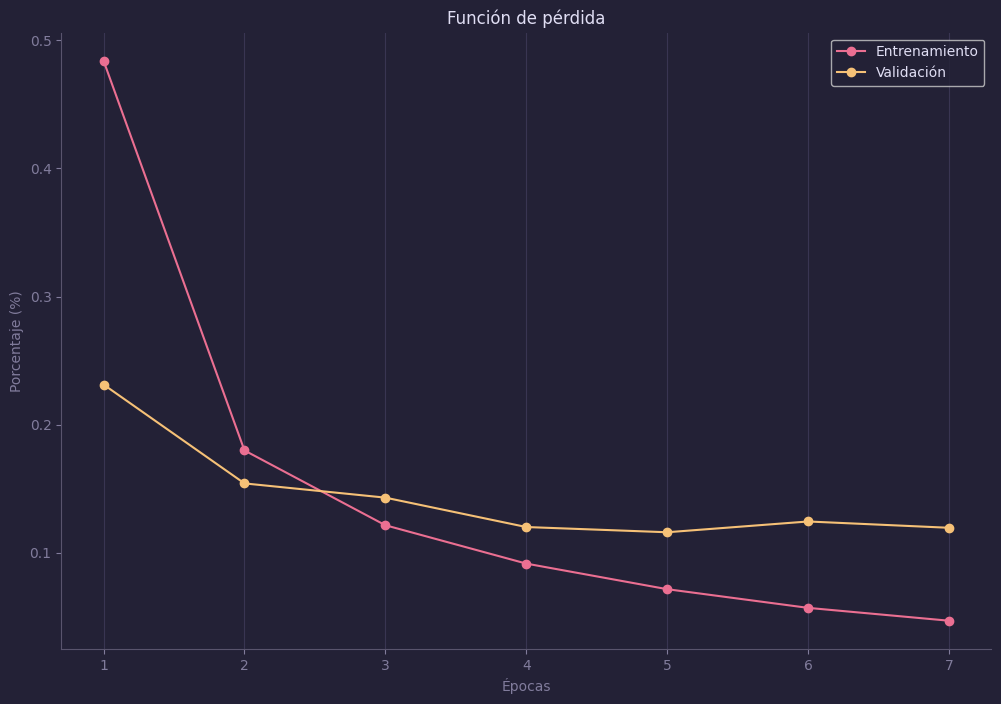

In [75]:
y_vector = [history.history['loss'],history.history['val_loss']]

epoch = range( 1 , epochs_number+1 )
x_vector = [epoch,epoch]

vector_labels = ['Entrenamiento','Validación']

size=(12,8)

nice_plots(x_vector=x_vector,
           y_vector=y_vector,
           vector_labels=vector_labels,
           x_label='Épocas',
           y_label='Porcentaje (%)',
           size=size,
           Title='Función de pérdida',
           style='https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine-moon.mplstyle'
           )
plt.show()

Es interesante observar que una vez que el modelo haya pasado unas $7$ épocas, se tiene que la función de pérdida del conjunto de validación es del $11\%$, mientras que la función de pérdida para el conjunto de entrenamiento se reduce proporcionalmente al número de época, llegando a una pérdida del $3\%$. Es normal observar esto, ya que el conjunto de entrenamiento está aprendiendo cada vez más del conjunto de entrenamiento, _memorizando_, en la jerga del _machine learning_. 

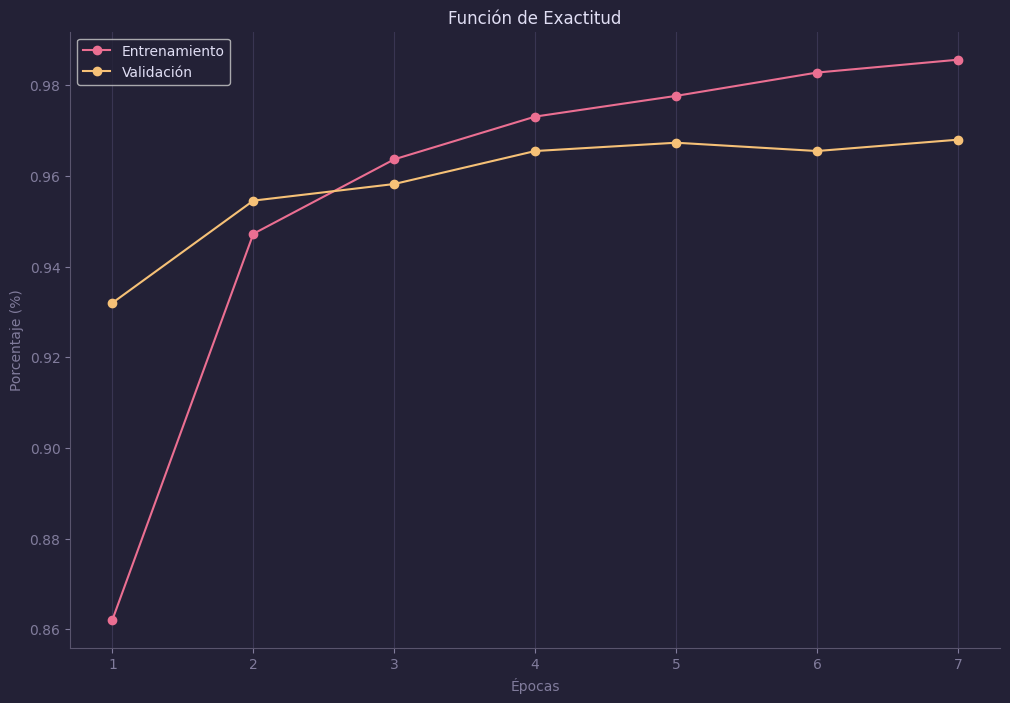

In [76]:
y_vector = [history.history['accuracy'],history.history['val_accuracy']]

size=(12,8)

nice_plots(x_vector=x_vector,
           y_vector=y_vector,
           vector_labels=vector_labels,
           x_label='Épocas',
           y_label='Porcentaje (%)',
           size=size,
           Title='Función de Exactitud',
           style='https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine-moon.mplstyle'
           )
plt.show()

El desempeño en la precisión del modelo es inversamente proporcional a la función de pérdida, se nota que la precisión para el modelo en el conjunto de validación se acerca al $97\%$. Esto es un indicador de que el modelo tiene buenas cualidades de predicción para un conjunto de datos diferente al conjunto de entrenamiento, por lo demás es notorio que la precisión para el conjunto de entrenamiento es alrededor del $99\%$, esto es evidente, ya que el modelo está ```memorizando``` los datos del conjunto de entrenamiento, pero considerando la métrica de precisión para el conjunto de validación, se tiene que la precisión es aceptable para este modelo sencillo. Otra cuestión interesante, con esta arquitectura se observó que realizar más de $7$ épocas no mejora significativamente la precisión observada en el conjunto de validación. Por lo que lo dejamos en $7$ épocas.   

## Matriz de confusión

Ahora, para crear la matriz de confusión y observar el desempeño del modelo mediante una visualización más efectiva, se procede a dejar de lado el codificado _one-hot_ de las variables categoricas que hicimos anteriormente, pasando de la matriz de ceros y unos, a un vector con dígitos del $0$ al $9$. Una vez que se obtienen las categorías, se guardan en un vector para luego hacer una pequeña lista con esos dígitos para las etiquetas del gráfico de matríz de confusión.  

In [77]:
y_pred = machine_model.predict(x_test)
score = machine_model.evaluate(x_test,y_test)
y_pred_labels = np.argmax(y_pred,1)
y_test_labels = np.argmax(y_test,1)
categories = np.unique(y_test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.1068 - accuracy: 0.9691


Se observa que la función de pérdidas para la etapa de la prueba obtiene un resultado del del $9\%$, mientras que la función de precisión o ```accuracy``` es del $97.6 \%$. Lo que nos indica que a pesar de todo, el modelo tiene una precisión bastante buena, considerando que la arquitectura no es particularmente complicada y no nos valemos de artilugios más complejos como podrían ser las capas de convolución para redes neuronales convolucionales (que son más idoneas para este tipo de tareas). Por lo que podemos decir que los resultados son relativamente aceptables, considerando todo lo anterior. 

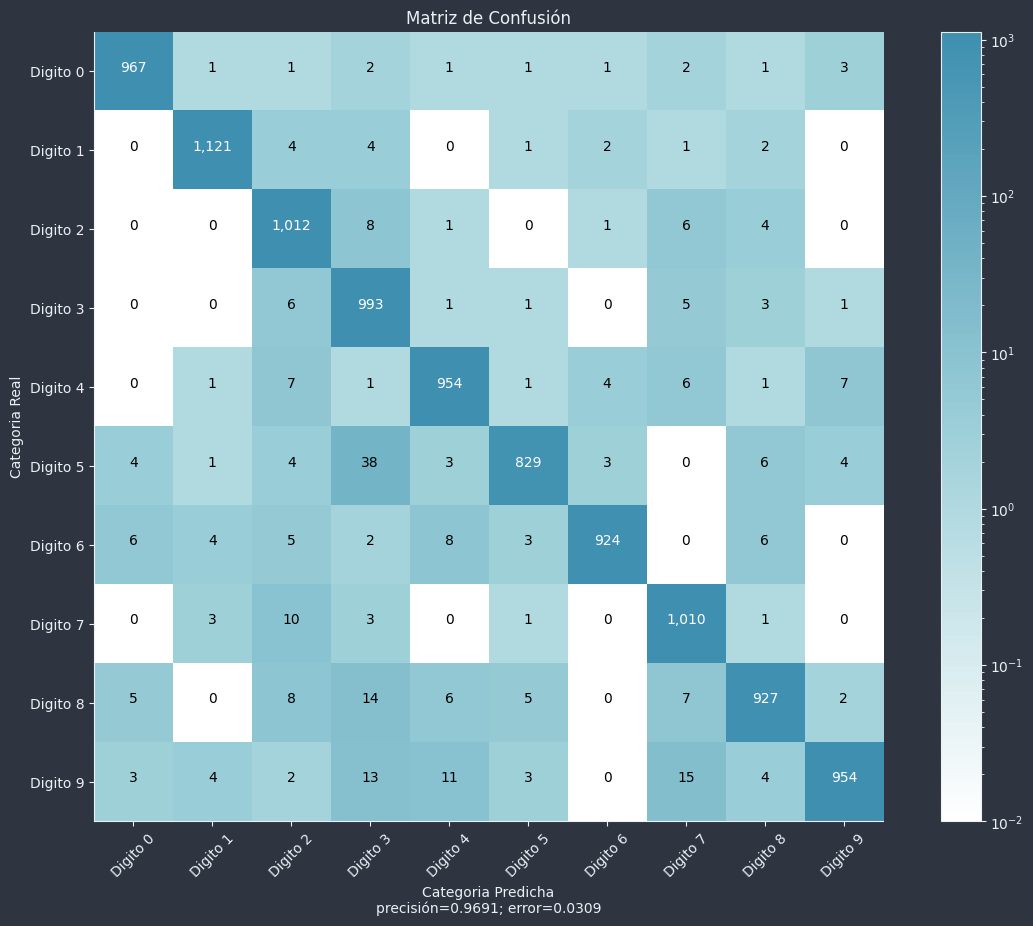

In [81]:
color_list = [(1,1,1),(156/255, 207/255, 216/255),(62/255, 143/255, 176/255)]
color_map = clr.LinearSegmentedColormap.from_list(name = '',colors=color_list,N=128)
color_map.set_bad(color='white')

Labels = []
for i in range(0,len(categories)):
  Labels.append(f'Digito {i}')

c_matrix = confusion_matrix(y_true = y_test_labels, y_pred = y_pred_labels)
plot_confusion_matrix(cm=c_matrix,
                      target_names = Labels,
                      title        = 'Matriz de Confusión',
                      cmap         = color_map,
                      normalize    = False,
                      norm         = clr.LogNorm(vmax=np.max(c_matrix),vmin=0.01),
                      style        = 'https://raw.githubusercontent.com/dolson14/nord-mplstyle/master/src/nord-dark.mplstyle',
                      size         = (12,9)
                      )

De forma interesante, se tiene que el modelo posee una precisión del $97\%$ una vez que se observa la matriz de confusión, en este caso, se nota que la categoria con mayor número de desaciertos es la del dígito $5$, que fue confundido 38 veces con el dígito $3$ por el algoritmo que fue implementado en este cuaderno. 